In [1]:
import sys
sys.path.insert(0, '../')
import LMP19
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nK = 36
nJ = 10
L96 = LMP19.Models.L96_23(nK=nK,nJ=nJ)
[b,c,F,h] = [10,10,10,1]

In [3]:
res = L96.get_data(theta=[b,c,F,h],nSteps=100,dt=0.001)
X = res[:nK,:]
Y = res[nK:,:]

<IPython.core.display.Javascript object>


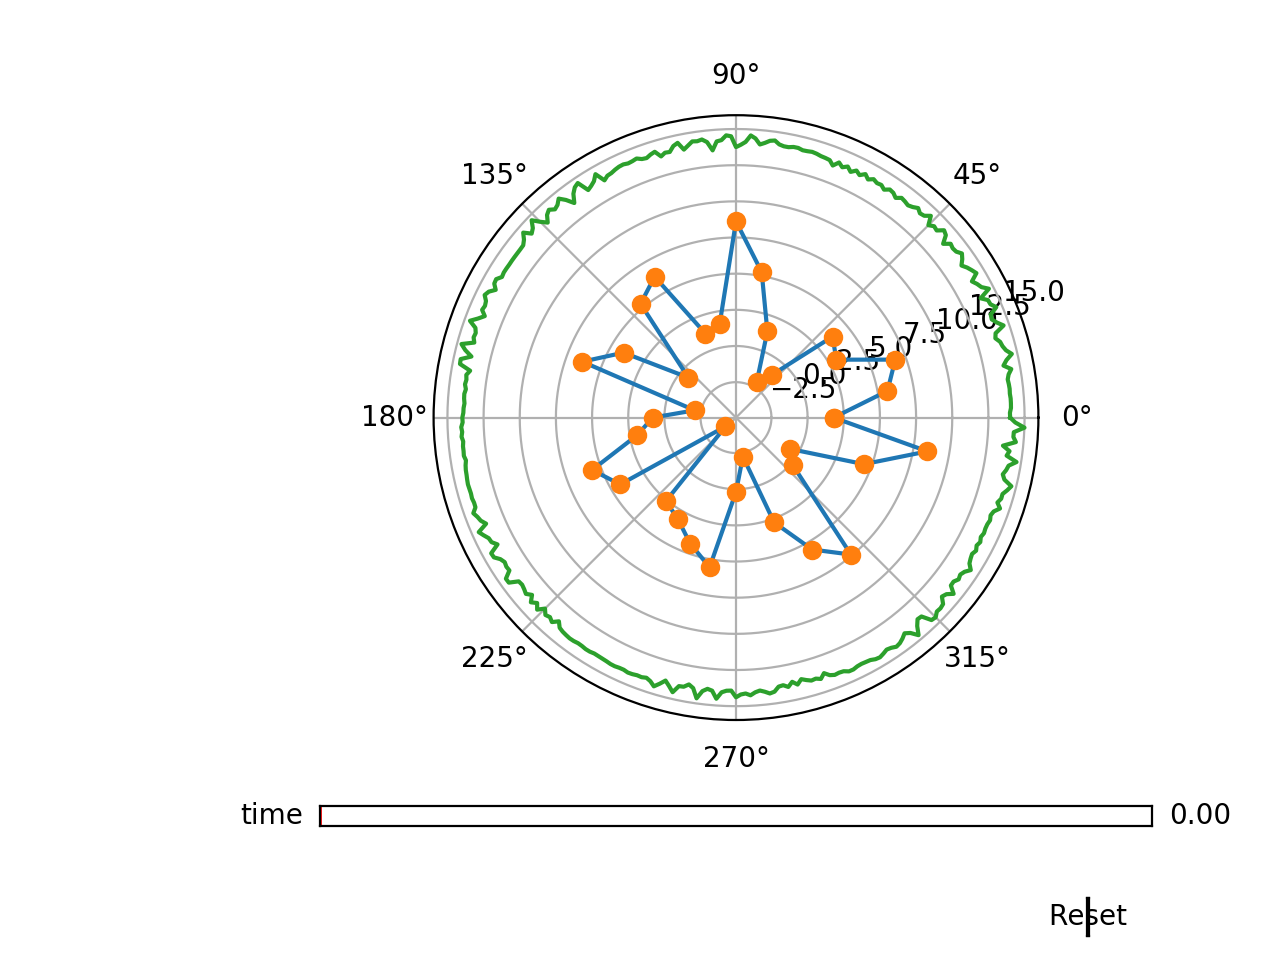

In [4]:
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib notebook

theta_X = np.linspace(0, 2*np.pi, nK+1)
theta_Y = np.linspace(0, 2*np.pi, nJ*nK+1)

def signal_X(kk):
    Xplt = [val for val in X[:,int(kk)]]+[X[0,int(kk)]]
    return(Xplt)
def signal_Y(kk):
    Yplt = [val+14 for val in Y[:,int(kk)]]+[Y[0,int(kk)]+14]
    return(Yplt)

fig = plt.figure()
ax = plt.subplot(111, projection='polar')


# Adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(left=0.25, bottom=0.25)


# Draw the initial plot
# The 'line' variable is used for modifying the line later
[line2] = ax.plot(theta_X,signal_X(-1))
[line1] = ax.plot(theta_X,signal_X(-1),'o')
[line3] = ax.plot(theta_Y,signal_Y(-1))

# Add sliders for tweaking the parameters

# Define an axes area and draw a slider in it
slider_ax  = fig.add_axes([0.25, 0.14, 0.65, 0.02])
slider = Slider(slider_ax, 'time', 0, X.shape[1], valinit=0)

# Define an action for modifying the line when any slider's value changes
def sliders_on_changed(val):
    data_X = signal_X(slider.val)
    data_Y = signal_Y(slider.val)
    ax.set_yticks([])
    ax.set_xticks([])
    line1.set_ydata(data_X)
    line2.set_ydata(data_X)
    line3.set_ydata(data_Y)
    fig.canvas.draw_idle()
slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

plt.show()

In [ ]:
%matplotlib inline

In [5]:
plt.imshow(X[:,::100])
plt.show()

In [6]:
plt.imshow(Y[:,::10])
plt.show()

# Covariance structure from long run

In [7]:
res = L96.get_data(theta=[b,c,F,h],nSteps=100000,dt=0.001)
Cov = np.cov(res)
L = L96.get_L(0.5)

KeyboardInterrupt: 

In [ ]:
plt.imshow(L)
plt.show()

In [ ]:
plt.imshow(Cov[:L96.nK,:L96.nK])
plt.colorbar()
plt.show()
plt.imshow(L[:L96.nK,:L96.nK])
plt.colorbar()
plt.show()

plt.imshow(Cov[:L96.nK,L96.nK:])
plt.colorbar()
plt.show()
plt.imshow(L[:L96.nK,L96.nK:])
plt.colorbar()
plt.show()

plt.imshow(Cov[L96.nK:,L96.nK:])
plt.colorbar()
plt.show()
plt.imshow(L[L96.nK:,L96.nK:])
plt.colorbar()
plt.show()